## Imports:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Data:

In [15]:
df = pd.read_csv("/data/hofpitching.csv").rename(columns = {"Unnamed: 1" : "name"})
df["name"] = df["name"].map(lambda x: x.rstrip(" HOF"))


In [16]:
df.head()

,Rk,name,Inducted,Yrs,From,To,ASG,WAR,W,L,...,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF
0,1.0,Pete Alexander,1938.0,20,1911,1930,0,112.8,373,208,...,1852,1476,165,951,NaN,2198,70.0,1,38,20893
1,2.0,Chief Bender,1953.0,16,1903,1925,0,40.8,212,127,...,1108,823,40,712,NaN,1711,102.0,10,79,11895
2,3.0,Bert Blyleven,2011.0,22,1970,1992,2,90.7,287,250,...,2029,1830,430,1322,71.0,3701,155.0,19,114,20491
3,4.0,Mordecai Brown,1949.0,14,1903,1916,0,51.7,239,130,...,1044,725,43,673,NaN,1375,61.0,4,61,12422
4,5.0,Jim Bunning,1996.0,17,1955,1971,9,56.7,224,184,...,1527,1366,372,1000,98.0,2855,160.0,8,47,15618


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        69 non-null     float64
 1   name      70 non-null     object 
 2   Inducted  69 non-null     float64
 3   Yrs       70 non-null     int64  
 4   From      70 non-null     int64  
 5   To        70 non-null     int64  
 6   ASG       70 non-null     int64  
 7   WAR       70 non-null     float64
 8   W         70 non-null     int64  
 9   L         70 non-null     int64  
 10  W-L%      70 non-null     float64
 11  ERA       70 non-null     float64
 12  G         70 non-null     int64  
 13  GS        70 non-null     int64  
 14  GF        70 non-null     int64  
 15  CG        70 non-null     int64  
 16  SHO       70 non-null     int64  
 17  SV        70 non-null     int64  
 18  IP        70 non-null     float64
 19  H         70 non-null     int64  
 20  R         70 non-null     int64  


## EDA:

In [37]:
def bf_map(x):
    if x > 20_000:
        return "More than 20,000"
    elif x >= 15_000:
        return "15,000 - 20,000"
    elif x >= 10_000:
        return "10,000 - 15,000"
    else:
        return "Less than 10,000"
    
df["BF_group"] = df["BF"].map(bf_map)

df["BF_group"].value_counts(sort = False)

Less than 10,000    11
More than 20,000    14
15,000 - 20,000     23
10,000 - 15,000     22
Name: BF_group, dtype: int64

In [38]:
df["BF_group"].value_counts(normalize = True, sort = False)

Less than 10,000    0.157143
More than 20,000    0.200000
15,000 - 20,000     0.328571
10,000 - 15,000     0.314286
Name: BF_group, dtype: float64

Text(0, 0.5, 'Frequency')

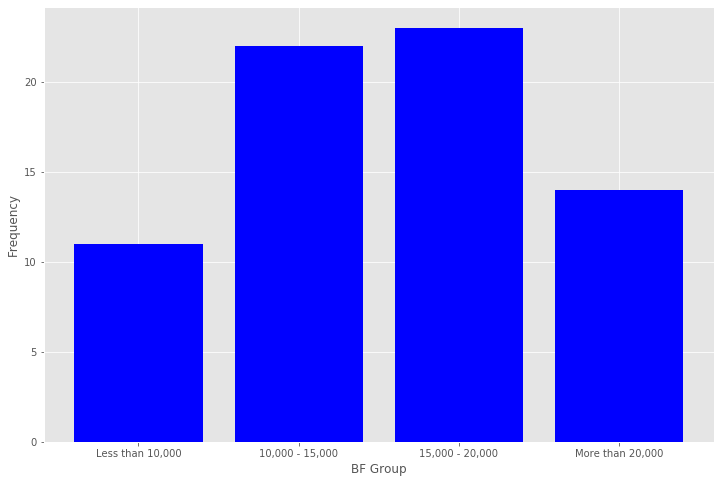

In [113]:
plt.figure(figsize = (12,8))

x = ["Less than 10,000", "10,000 - 15,000", "15,000 - 20,000", "More than 20,000"]
height = [11, 22, 23, 14]

plt.bar(x, height, color = "b")

# plt.title()
plt.xlabel("BF Group")
plt.ylabel("Frequency")